## (10%) Can you compare Bellman-Ford Shortest Path and Dijkstra Shortest Path these two algoriths? 

#### Solutions

In [2]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## (20%) Nodes and Edges: How do we represent relationships between individuals using NetworkX?

As mentioned in class, networks, also known as graphs, are comprised of individual entities and their representatives. The technical term for these are nodes and edges, and when we draw them we typically use circles (nodes) and lines (edges). 

In this notebook, we will work with a social network of seventh graders, in which nodes are individual students, and edges represent their relationships. Edges between individuals show how often the seventh graders indicated other seventh graders as their favourite.

Data credit: http://konect.uni-koblenz.de/networks/moreno_seventh

## Data Representation

In the `networkx` implementation, graph objects store their data in dictionaries. 

Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 

Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: `G.edge[node1][node2]['attr_name']`.

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

## Load Data

Let's load some real network data to get a feel for the NetworkX API. This [dataset](http://konect.uni-koblenz.de/networks/moreno_seventh) comes from a study of 7th grade students.

> This directed network contains proximity ratings between studetns from 29 seventh grade students from a school in Victoria. Among other questions the students were asked to nominate their preferred classmates for three different activities. A node represents a student. An edge between two nodes shows that the left student picked the right student as his answer. The edge weights are between 1 and 3 and show how often the left student chose the right student as his favourite.


Questions 1: Can you use the data out.moreno_seventh_seventh for edges information and ent.moreno_seventh_seventh.student.gender for nodes inforamtion to generate a graph with NetworkX nx.DiGraph() function?

Questions 2: Can you find out some network statistics of this graph, for example, nodes number, edges number, how many are males and how many are females, etc? More properties you can find are welcome!

Question 3: Try to count the number of "unrequited" friendships, that is, they have rated another student as their favourite at least once, but that other student has not rated them as their favourite at least once. Specifically, get a list of edges for which the reverse edge is not present.

Questions 4: Can you visualize this network? you can try networkX.draw() function or nxviz package.

#### Solutions

In [7]:
import load_data
G_seventh_grader = load_data.load_seventh_grader_network()
G_seventh_grader

In [8]:
print('No of nodes in G: {}'.format(G_seventh_grader.number_of_nodes()))
print('No of edges in G: {}'.format(G_seventh_grader.number_of_edges()))
from collections import Counter
mf_counts = Counter([d['gender'] 
                     for n, d in G_seventh_grader.nodes(data=True)])
print('No of female students: {}'.format(mf_counts['female']))
print('No of male students: {}'.format(mf_counts['male']))

No of nodes in G: 29
No of edges in G: 376
No of female students: 17
No of male students: 12


In [9]:
unrequitted_friendships = []
for n1, n2 in G_seventh_grader.edges():
    if not G.has_edge(n2, n1):
        unrequitted_friendships.append((n1, n2))
print('No of unrequitted friendships: {}'.format(len(unrequitted_friendships)))

No of unrequitted friendships: 124


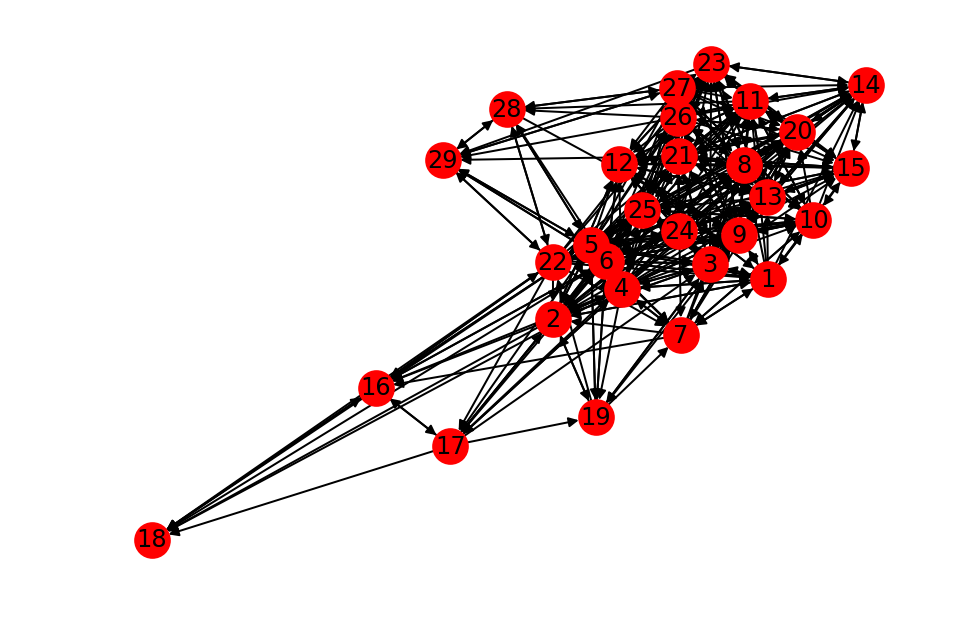

In [10]:
nx.draw(G_seventh_grader,with_labels=True)
plt.draw()
plt.show()

## (30%) Finding out important nodes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from custom import load_data as cf
from custom import ecdf
import warnings
warnings.filterwarnings('ignore')
from nxviz import CircosPlot
import numpy as np


%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data

We will load the [sociopatterns network](http://konect.uni-koblenz.de/networks/sociopatterns-infectious) data for this notebook. From the Konect website:

> This network describes the face-to-face behavior of people during the exhibition INFECTIOUS: STAY AWAY in 2009 at the Science Gallery in Dublin. Nodes represent exhibition visitors; edges represent face-to-face contacts that were active for at least 20 seconds. Multiple edges between two nodes are possible and denote multiple contacts. The network contains the data from the day with the most interactions.


Questions 1: How do you know the number of neighbours of each given node? The importance of nodes is ranked by the number of their neighbors. Implement this.


Questions 2: We can use another way to measure the importance of nodes by centrality. The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a degree centrality, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using nx.degree_centrality(G). Could you get the distribution plot (or histogram) of all centralities in all nodes in this network.   



#### Solutions

In [16]:
import load_data
G_sociopatterns = load_data.load_sociopatterns_network()
G_sociopatterns

In [29]:
sorted(G_sociopatterns.degree, key=lambda x: x[1], reverse=True)[0]

(51, 50)

In [32]:
g_cent = nx.degree_centrality(G_sociopatterns)
sorted(g_cent, key=g_cent.get, reverse=True)[0]

51

## (20%) Paths in a Network (Using sociopatterns network data from previous problem.)


We will figure out how to answer the following questions:

Questions 1. Can you write a function to show whether there is a path between two nodes. 

Questions 2. Can you write a function to return shortest path from node 4 to node 100? Return nodes list at this shortest path.

Question 3. Write a function that extracts only node, its neighbors, and the edges between that node and its neighbors as a new graph. Then, draw the new graph to screen.

Question 4. If we want a message to go from one person to another person, and we assume that the message takes 1 day for the initial step and 1 additional day per step in the transmission chain (i.e. the first step takes 1 day, the second step takes 2 days etc.). What is the distribution of message spread times from person to person? 

Question 5. What is betweenness centrality? Could you calculate this measure for each node of a bar bell graph generaed by nx.barbell_graph(5, 1)? 




#### Solutions

In [57]:
def path_exists(G, node1, node2):
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

    print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
    return False

In [64]:
path_exists(G_sociopatterns, 11, 12)
print('Is path exists between 11, 12: {}'.format(nx.has_path(G_sociopatterns, 11, 12)))
path_exists(G_sociopatterns, 11, 51)
print('Is path exists between 11, 51: {}'.format(nx.has_path(G_sociopatterns, 11, 51)))

Path exists between nodes 11 and 12
Is path exists between 11, 12: True
Path does not exist between nodes 11 and 51
Is path exists between 11, 51: True


## (20%) Network triangles and cliques.

Data for this part can be found at http://konect.uni-koblenz.de/networks/moreno_innovation. We say physician network for this network data. 

    This directed network captures innovation spread among 246 physicians in for towns in Illinois, Peoria, Bloomington, Quincy and Galesburg. The data was collected in 1966. A node represents a physician and an edge between two physicians shows that the left physician told that the righ physician is his friend or that he turns to the right physician if he needs advice or is interested in a discussion. There always only exists one edge between two nodes even if more than one of the listed conditions are true.
    
Question 1. 

Can you write a function that can judge whether the given node can form a triangle relation with other nodes. 
For example (just for explanation purpose, not necessary true at current physician network), node 3 has neighbors 4 and 5, if nodes 4 and 5 are neightbor each other, we said nodes 3,4,5 form a triangle relation. How about node 3 at this physician network?


Questions 2. Can you write a function that takes in one node and its associated graph as an input, and returns a list or set of itself + all other nodes that it is in a triangle relationship with? Do not return the triplets, but the set/list of nodes. 

How about all traingle relations for node 3 at this physicians network. Using graph to compare those nodes in triangle relation and those nodes neighboring to 3. 

Questions 3. Can you write a function that identifies, for a given node, the other two nodes that it is involved with in an open triangle, if there is one? For example, node 3 has neighbors 4 and 5, if nodes 4 and 5 are NOT neightbor each other, we can suggest nodes 3,4,5 to form a NEW triangle relation. What are those NEW tirangle relations for node 3 and how many of them?

Questions 4. What are cliques in a network? Using nx.find_cliques(G) to find cliques at this physician network with given clique size.


#### Solutions

In [4]:
import load_data
G_physicians = load_data.load_physicians_network()

In [5]:
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [6]:
is_in_triangle(G_physicians, 3)

True

In [7]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes

In [8]:
nodes_in_triangle(G_physicians, 3)

{3, 9, 11, 41, 42, 67}

In [15]:
def node_in_open_triangle(G, n):
    possible_triangle_nodes = set([n])
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 have an edge between them
        if not G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            possible_triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            possible_triangle_nodes.add(n2)
            
    return possible_triangle_nodes

In [16]:
node_in_open_triangle(G_physicians, 3)

{1, 3, 9, 11, 41, 42, 67, 91, 101, 112}

In [17]:
len(node_in_open_triangle(G_physicians, 3))

10

In [22]:
import networkx as nx

def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [23]:
len(maximal_cliques(G_physicians, 3))

224